# (Test) Expected number of applicants -- based only on grade

In this notebook I will try to retrieve the expected number of test takers for each school, based on its general characteristics.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.special import logit

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

df = pd.read_pickle('../data/process/schools2017.pkl')

#Remove 45 (out of 578) entries where the # of SHSAT Testers is not specified.
df = df[df['# SHSAT Testers'].notnull()]

# Retrieve percentage of testers
df['% SHSAT Testers'] = df['# SHSAT Testers'] / df['# Students Grade 8']

df.head()

,School Name,Borough,Charter School,Economic Need Index,% Female,% Male,% Asian,% Black,% Hispanic,% Multiple Race Categories Not Represented,% White,% Students with Disabilities,% English Language Learners,% Poverty,Number Tested - ELA,Mean Scale Score - ELA,# Level 1 - ELA,% Level 1 - ELA,# Level 2 - ELA,% Level 2 - ELA,# Level 3 - ELA,% Level 3 - ELA,# Level 4 - ELA,% Level 4 - ELA,# Level 3+4 - ELA,% Level 3+4 - ELA,Number Tested - Math,Mean Scale Score - Math,# Level 1 - Math,% Level 1 - Math,# Level 2 - Math,% Level 2 - Math,# Level 3 - Math,% Level 3 - Math,# Level 4 - Math,% Level 4 - Math,# Level 3+4 - Math,% Level 3+4 - Math,# Students Grade 8,# SHSAT Testers,% SHSAT Testers
DBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,Manhattan,0,0.939015,0.450450,0.549550,0.033033,0.318318,0.612613,0.009009,0.027027,0.366366,0.075075,0.975976,54,298.2778,9.0,16.666670,32.0,59.25926,12.0,22.22222,1.0,1.851852,13.0,24.07407,52,285.9423,27.0,51.923080,18.0,34.61538,7.0,13.461540,0.0,0.000000,7.0,13.46154,58,6.0,0.103448
01M140,P.S. 140 Nathan Straus,Manhattan,0,0.905606,0.490566,0.509434,0.056604,0.123989,0.787062,0.005391,0.026954,0.309973,0.097035,0.873315,55,297.4545,9.0,16.363640,33.0,60.00000,12.0,21.81818,1.0,1.818182,13.0,23.63636,57,291.2456,27.0,47.368420,22.0,38.59649,8.0,14.035090,0.0,0.000000,8.0,14.03509,66,6.0,0.090909
01M184,P.S. 184m Shuang Wen,Manhattan,0,0.639987,0.498538,0.501462,0.694444,0.036550,0.134503,0.061404,0.073099,0.165205,0.150585,0.675439,81,330.1358,4.0,4.938272,17.0,20.98765,32.0,39.50617,28.0,34.567900,60.0,74.07407,83,339.6988,8.0,9.638554,14.0,16.86747,24.0,28.915660,37.0,44.578310,61.0,73.49398,87,67.0,0.770115
01M301,"Technology, Arts, and Sciences Studio",Manhattan,0,0.833962,0.452830,0.547170,0.037736,0.320755,0.547170,0.037736,0.056604,0.424528,0.028302,0.820755,41,304.7073,7.0,17.073170,19.0,46.34146,13.0,31.70732,2.0,4.878049,15.0,36.58537,41,288.1951,20.0,48.780490,15.0,36.58537,5.0,12.195120,1.0,2.439024,6.0,14.63415,51,11.0,0.215686
01M332,University Neighborhood Middle School,Manhattan,0,0.844232,0.433498,0.566502,0.088670,0.231527,0.630542,0.009852,0.039409,0.443350,0.054187,0.876847,61,296.6557,17.0,27.868850,28.0,45.90164,11.0,18.03279,5.0,8.196721,16.0,26.22951,59,281.7119,34.0,57.627120,18.0,30.50847,5.0,8.474576,2.0,3.389831,7.0,11.86441,69,13.0,0.188406


In [3]:
columns = [
#     'Mean Scale Score - ELA',
    'Mean Scale Score - Math',
]

inputs = df[columns]
targets = logit(df['% SHSAT Testers'])

Score: 0.5378263998354822


0.5325892189410989

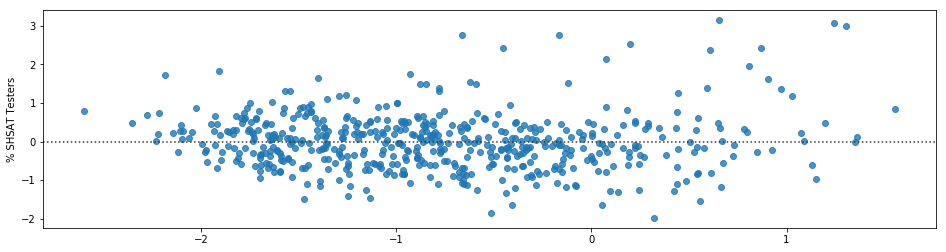

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(inputs, targets)
values = model.predict(inputs)

plt.figure(figsize=(16, 4))
sns.residplot(values, targets)

pd.Series(model.coef_, index=inputs.columns).sort_values()

print("Score:", model.score(inputs, targets))
mean_squared_error(values, targets)

# this is the same error we are getting in the full model...

# the big difference before was because we included the ELA score

# now there's no difference, so, a simple mean may perform the same as the expectation of
# a estimated probability distribution